In [10]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [11]:
import zipfile
with zipfile.ZipFile('../content/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../content/')

In [12]:
data=pd.read_csv('../content/creditcard.csv')

In [13]:
data.shape

(284807, 31)

In [14]:
X = data.loc[:, data.columns != 'Class']
Y = data.Class

In [15]:
#OvererSampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_OS, Y_OS = oversample.fit_resample(X, Y)

In [16]:
print(X_OS.shape,Y_OS.shape)

(568630, 30) (568630,)


In [17]:
data_OS = pd.concat([X_OS, Y_OS], axis=1)
print(data_OS.shape)
print(data_OS.groupby('Class').size())

(568630, 31)
Class
0    284315
1    284315
dtype: int64


C:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    284315
0    284315
Name: Class, dtype: int64


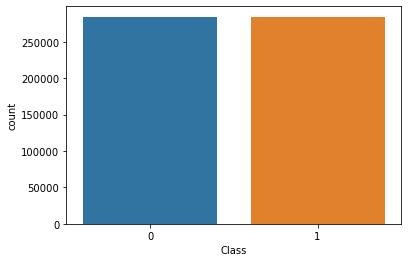

In [18]:
#Fradulent/ Non-Fradulent Samples Plot
y = data_OS["Class"]
sns.countplot(y)
target_temp = data_OS.Class.value_counts()
print(target_temp)

In [10]:
data_OS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

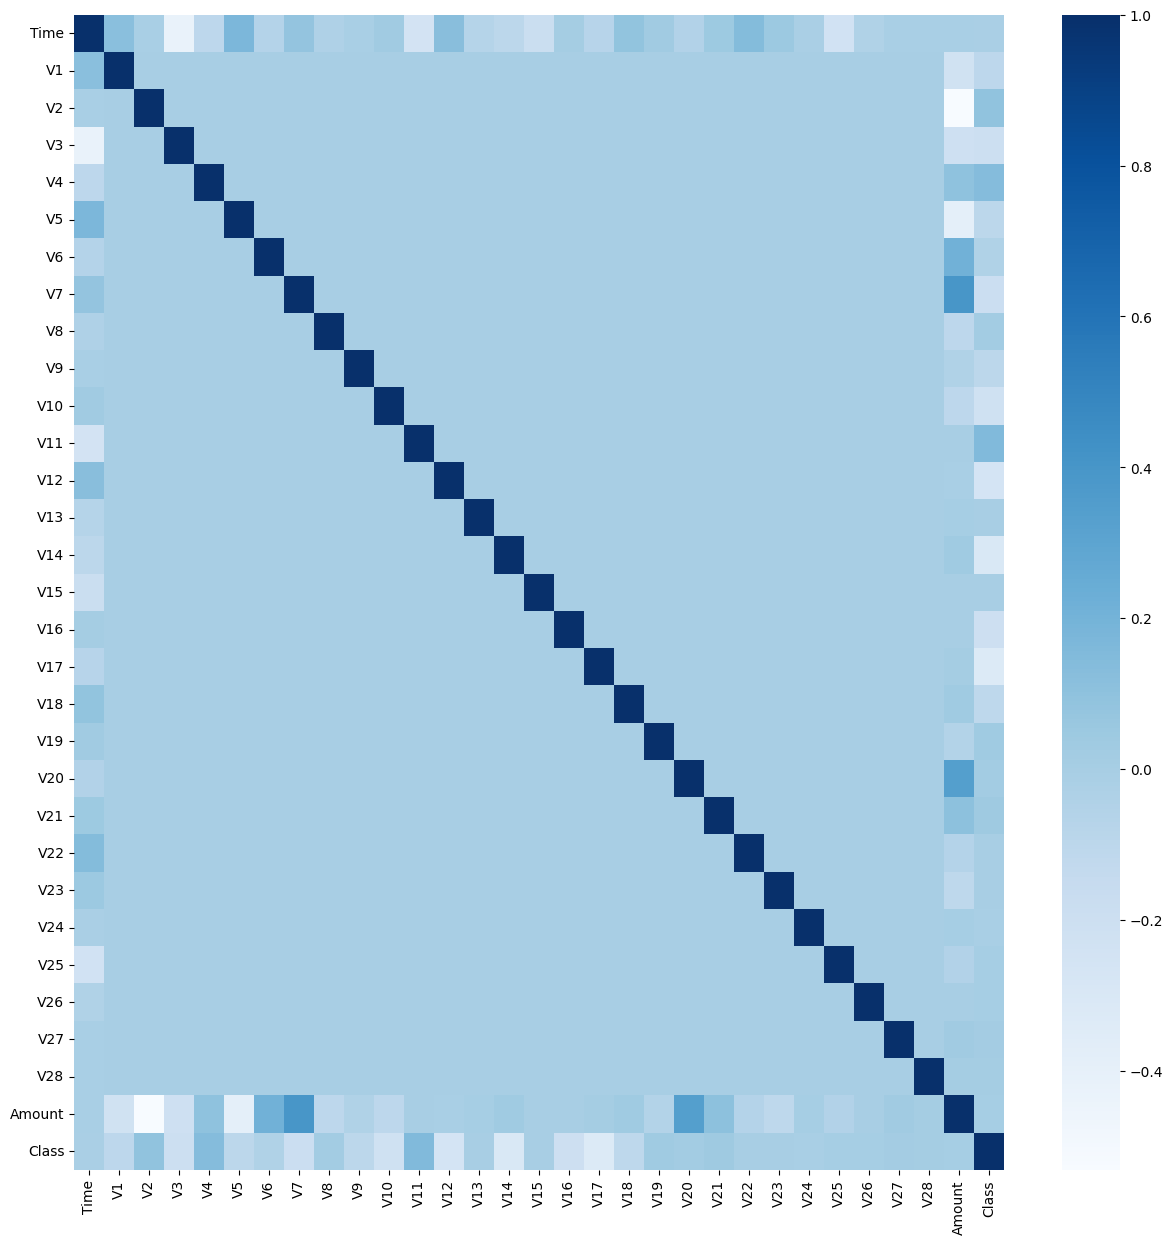

In [11]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap = "Blues")
plt.show()

In [12]:
print(data_OS.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.709624
V11       0.686211
V2        0.488028
V19       0.270366
V20       0.168303
V21       0.126218
V28       0.082184
V27       0.080563
Amount    0.067201
V8        0.057811
V26       0.054901
V25       0.029672
V22       0.008150
V23      -0.015873
V15      -0.045668
V13      -0.050928
V24      -0.092232
Time     -0.147058
V5       -0.375367
V6       -0.397768
V1       -0.433510
V18      -0.469125
V7       -0.475914
V9       -0.556925
V17      -0.560709
V3       -0.566298
V16      -0.597542
V10      -0.626427
V12      -0.683082
V14      -0.748937
Name: Class, dtype: float64


In [13]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Class",axis=1)
target = data["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(X_OS,Y_OS,test_size=0.20,random_state=0)

In [14]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454904, 30) (454904,) (113726, 30) (113726,)


In [16]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

Training Time: 91.95855617523193
Training Accuracy Score: 1.0
Pred Time: 0.5759589672088623
Testing Accuracy Score: 0.9999560346798445
AUC Score: 0.9999559269445032
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [17]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 6.451744079589844
Training Accuracy Score: 1.0
Pred Time: 0.024508237838745117
Testing Accuracy Score: 0.9997977595272849
AUC Score: 0.9997972639447147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [18]:
#LDA
lda = LinearDiscriminantAnalysis()
st=time.time()
lda.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lda=lda.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lda)))
st=time.time()
Y_pred_lda = lda.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lda)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lda,average='weighted')))
print(classification_report(Y_test,Y_pred_lda))

Training Time: 0.9707739353179932
Training Accuracy Score: 0.9203304433462884
Pred Time: 0.003991127014160156
Testing Accuracy Score: 0.9199303589328738
AUC Score: 0.9200930669161186
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     56724
           1       0.98      0.85      0.91     57002

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726



In [19]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 19.610546827316284
Training Accuracy Score: 1.0
Pred time: 0.06270003318786621
Testing Accuracy Score: 0.9999296554877513
AUC Score: 0.9999294831112051
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

